In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fn = ('/mnt/processed/private/msds2021/lt6/chicago-dataset/sample/'
      'taxi_tnp_weather.csv.gz')
df = pd.read_csv(fn, low_memory=False,
                 parse_dates=['trip_end_timestamp', 'trip_start_timestamp'])

In [3]:
# Check if Trip has Tip
df.loc[:, 'has_tip'] = df.tip > 0

In [4]:
# Add New Features
df['start_hour'] = df.trip_start_timestamp.dt.hour
df['start_day'] = df.trip_start_timestamp.dt.weekday
df['start_month'] = df.trip_start_timestamp.dt.month

df['end_hour'] = df.trip_end_timestamp.dt.hour
df['end_day'] = df.trip_end_timestamp.dt.weekday
df['end_month'] = df.trip_end_timestamp.dt.month

df.loc[:, 'fare_per_sec'] = df.fare / df.trip_seconds
df.loc[:, 'fare_per_mile'] = df.fare / df.trip_miles

In [5]:
df_taxi = df[df.TransportType == 'taxi'].copy()
df_tnp = df[df.TransportType == 'tnp'].copy()

## Analysis by Quintile Values

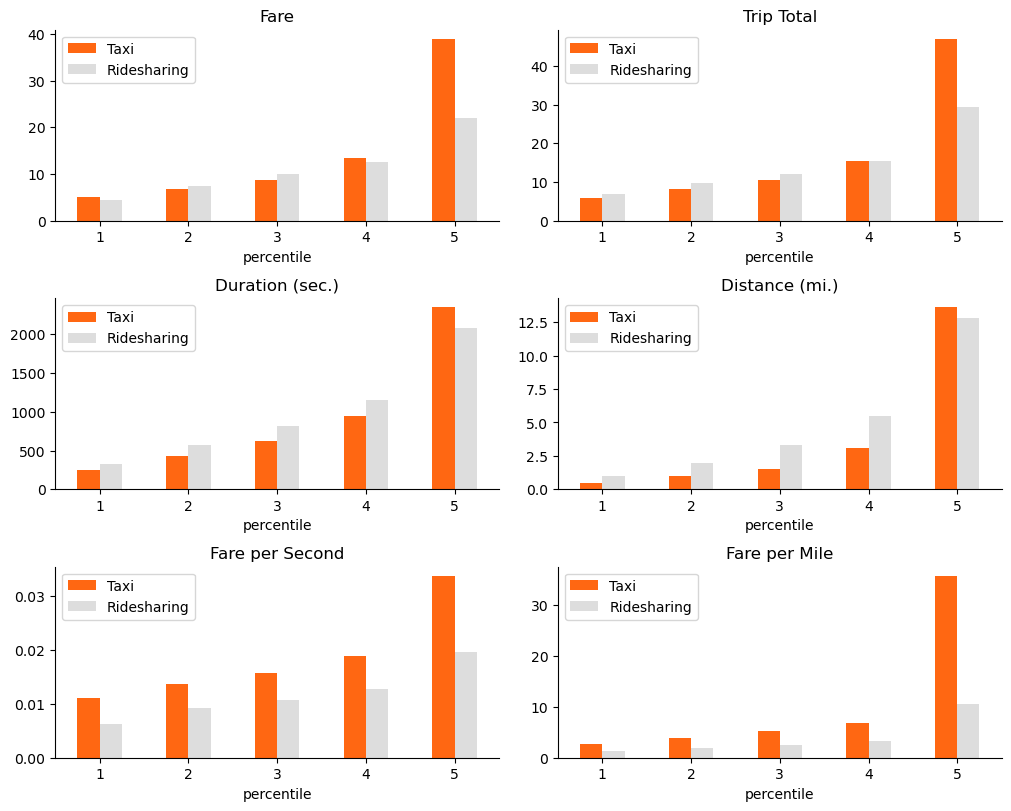

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 8), dpi=100,
                         constrained_layout=True)
stats = ['fare', 'trip_total',
         'trip_seconds', 'trip_miles',
         'fare_per_sec', 'fare_per_mile']
titles = ['Fare', 'Trip Total',
          'Duration (sec.)', 'Distance (mi.)',
          'Fare per Second', 'Fare per Mile']

for s, t, ax in zip(stats, titles, axes.flatten()):

    pdf_taxi = df_taxi.loc[:, s].to_frame()
    pdf_taxi.loc[:, 'percentile'] = pd.qcut(df_taxi.loc[:, s], 5, labels=range(1, 6))
    pdf_taxi = pdf_taxi.groupby('percentile').mean()

    pdf_tnp = df_tnp.loc[:, s].to_frame()
    pdf_tnp.loc[:, 'percentile'] = pd.qcut(df_tnp.loc[:, s], 5, labels=range(1, 6))
    pdf_tnp = pdf_tnp.groupby('percentile').mean()

    pdf = pd.concat([pdf_taxi, pdf_tnp], axis=1)
    pdf.columns = ['Taxi', 'Ridesharing']
    pdf.plot.bar(ax=ax,  color=['#FF6712', '#DDDDDD'], rot=0)
    ax.set_title(t)
    
sns.despine()

                 Taxi  Ridesharing
percentile                        
1            5.192727     4.484277
2            6.840132     7.500000
3            8.719618    10.000000
4           13.399394    12.500000
5           38.924037    21.965604
                 Taxi  Ridesharing
percentile                        
1            5.783110     6.876822
2            8.243462     9.846634
3           10.589376    12.200232
4           15.547445    15.535148
5           46.967351    29.313310


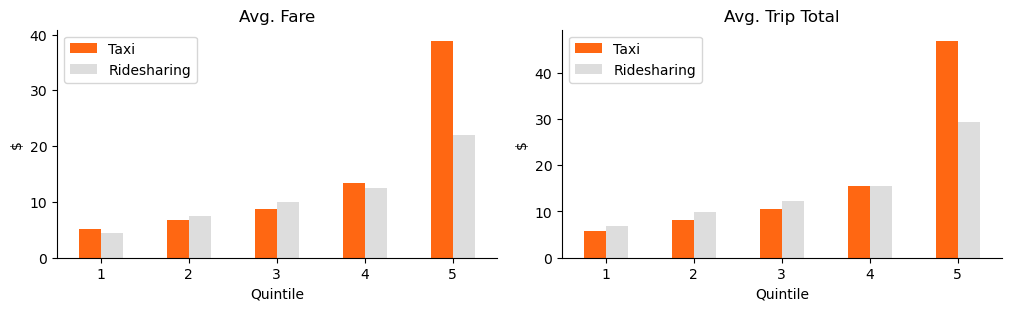

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), dpi=100,
                         constrained_layout=True)
stats = ['fare', 'trip_total']
titles = ['Avg. Fare', 'Avg. Trip Total']
ylabels = ['$', '$']

for s, t, yl, ax in zip(stats, titles, ylabels, axes.flatten()):

    pdf_taxi = df_taxi.loc[:, s].to_frame()
    pdf_taxi.loc[:, 'percentile'] = pd.qcut(df_taxi.loc[:, s], 5, labels=range(1, 6))
    pdf_taxi = pdf_taxi.groupby('percentile').mean()

    pdf_tnp = df_tnp.loc[:, s].to_frame()
    pdf_tnp.loc[:, 'percentile'] = pd.qcut(df_tnp.loc[:, s], 5, labels=range(1, 6))
    pdf_tnp = pdf_tnp.groupby('percentile').mean()

    pdf = pd.concat([pdf_taxi, pdf_tnp], axis=1)
    pdf.columns = ['Taxi', 'Ridesharing']
    pdf.plot.bar(ax=ax,  color=['#FF6712', '#DDDDDD'], rot=0)
    ax.set_title(t)
    ax.set_ylabel(yl)
    ax.set_xlabel("Quintile")
    
    print(pdf)
    
sns.despine()

                 Taxi  Ridesharing
percentile                        
1            4.051489     5.446570
2            7.156147     9.562536
3           10.300217    13.634960
4           15.770792    19.298005
5           39.159541    34.694113
                 Taxi  Ridesharing
percentile                        
1            0.464659     0.998111
2            0.985199     1.961444
3            1.535765     3.290993
4            3.093332     5.520912
5           13.627165    12.792389


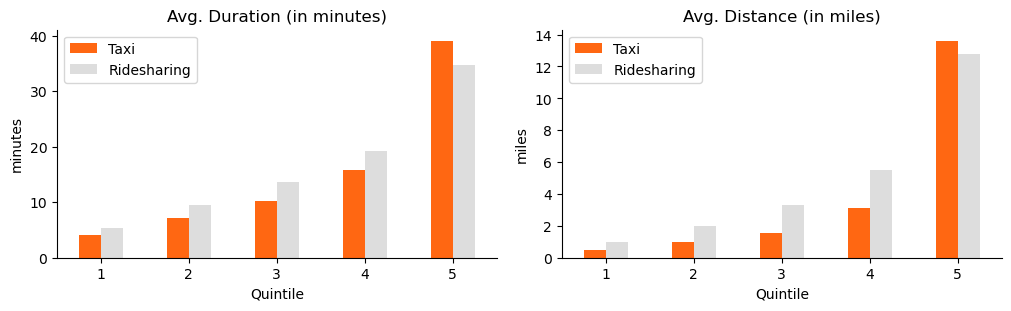

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), dpi=100,
                         constrained_layout=True)
stats = ['trip_seconds', 'trip_miles']
titles = ['Avg. Duration (in minutes)', 'Avg. Distance (in miles)']
ylabels = ['minutes', 'miles']

for s, t, yl, ax in zip(stats, titles, ylabels, axes.flatten()):

    pdf_taxi = df_taxi.loc[:, s].to_frame()
    pdf_taxi.loc[:, 'percentile'] = pd.qcut(df_taxi.loc[:, s], 5, labels=range(1, 6))
    pdf_taxi = pdf_taxi.groupby('percentile').mean()

    pdf_tnp = df_tnp.loc[:, s].to_frame()
    pdf_tnp.loc[:, 'percentile'] = pd.qcut(df_tnp.loc[:, s], 5, labels=range(1, 6))
    pdf_tnp = pdf_tnp.groupby('percentile').mean()

    pdf = pd.concat([pdf_taxi, pdf_tnp], axis=1)
    if (s == 'trip_seconds'):
        pdf = pdf / 60
    pdf.columns = ['Taxi', 'Ridesharing']
    pdf.plot.bar(ax=ax,  color=['#FF6712', '#DDDDDD'], rot=0)
    ax.set_title(t)
    ax.set_ylabel(yl)
    ax.set_xlabel("Quintile")
    
    print(pdf)
    
sns.despine()

                Taxi  Ridesharing
percentile                       
1           0.663055     0.372156
2           0.819056     0.551847
3           0.946160     0.645146
4           1.126548     0.760798
5           2.022173     1.178683
            Taxi  Ridesharing
percentile                   
1            NaN    -0.290899
2            NaN    -0.267209
3            NaN    -0.301013
4            NaN    -0.365749
5            NaN    -0.843490
                 Taxi  Ridesharing
percentile                        
1            2.677449     1.287966
2            3.919445     1.947984
3            5.302143     2.539083
4            6.796507     3.352901
5           35.707535    10.525294
            Taxi  Ridesharing
percentile                   
1            NaN    -1.389483
2            NaN    -1.971461
3            NaN    -2.763061
4            NaN    -3.443606
5            NaN   -25.182241


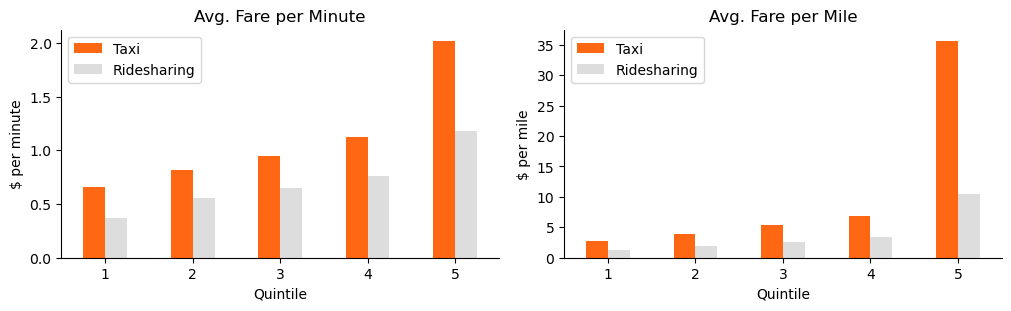

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), dpi=100,
                         constrained_layout=True)
stats = ['fare_per_sec', 'fare_per_mile']
titles = ['Avg. Fare per Minute', 'Avg. Fare per Mile']
ylabels = ['$ per minute', '$ per mile']

for s, t, yl, ax in zip(stats, titles, ylabels, axes.flatten()):

    pdf_taxi = df_taxi.loc[:, s].to_frame()
    pdf_taxi.loc[:, 'percentile'] = pd.qcut(df_taxi.loc[:, s], 5, labels=range(1, 6))
    pdf_taxi = pdf_taxi.groupby('percentile').mean()

    pdf_tnp = df_tnp.loc[:, s].to_frame()
    pdf_tnp.loc[:, 'percentile'] = pd.qcut(df_tnp.loc[:, s], 5, labels=range(1, 6))
    pdf_tnp = pdf_tnp.groupby('percentile').mean()

    pdf = pd.concat([pdf_taxi, pdf_tnp], axis=1)
    if (s == 'fare_per_sec'):
        pdf = pdf * 60
    pdf.columns = ['Taxi', 'Ridesharing']
    pdf.plot.bar(ax=ax,  color=['#FF6712', '#DDDDDD'], rot=0)
    ax.set_title(t)
    ax.set_ylabel(yl)
    ax.set_xlabel("Quintile")
    
    print(pdf)
    print(pdf.diff(axis=1))
    
sns.despine()

# Tipping Behavior Comparison between Taxi and Ridesharing

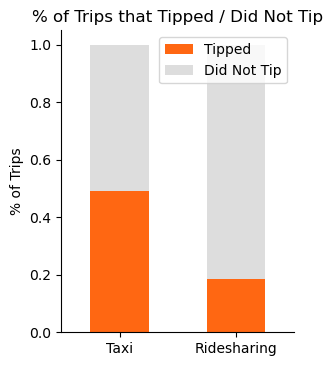

In [10]:
pdf = df.pivot_table(index='TransportType', columns='has_tip', aggfunc="size")
pdf = pdf.divide(pdf.sum(axis=1), axis=0)
pdf.columns = ['Did Not Tip', 'Tipped']

fig, ax = plt.subplots(figsize=(3, 4), dpi=100)
pdf.loc[:, ['Tipped', 'Did Not Tip']].plot \
    .bar(stacked=True, color=['#FF6712', '#DDDDDD'], rot=0, ax=ax)
ax.set_xticklabels(['Taxi', 'Ridesharing'])
ax.set_xlabel("")
ax.set_ylabel("% of Trips")
ax.set_title("% of Trips that Tipped / Did Not Tip")
sns.despine()

In [11]:
pdf

,Did Not Tip,Tipped
TransportType,,
taxi,0.510058,0.489942
tnp,0.815733,0.184267


## Tips per Payment Type

                Tipped  Did Not Tip
payment_type                       
cash          0.000566     0.999434
credit_card   0.955477     0.044523
mobile        0.986166     0.013834
prepaid_card  0.081395     0.918605
unknown       0.037474     0.962526


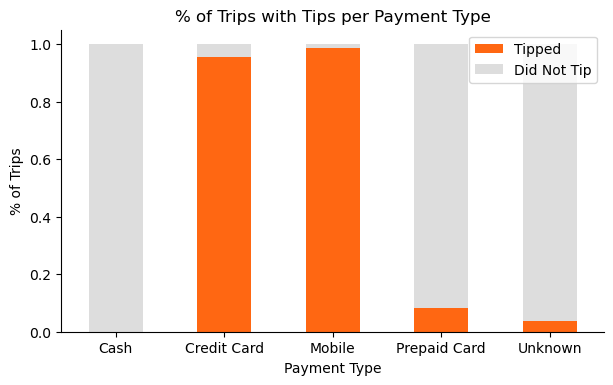

In [12]:
df_payment_tips = df_taxi.pivot_table(index=['payment_type'],
                                      columns='has_tip', aggfunc='size')
df_payment_tips.columns = ['Did Not Tip', 'Tipped']
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
df_payment_tips.loc[:, ['Tipped', 'Did Not Tip']].divide(df_payment_tips.sum(axis=1), axis=0) \
    .plot.bar(stacked=True, ax=ax, color=['#FF6712', '#DDDDDD'], rot=0)
sns.despine()
ax.set_xticklabels(['Cash', 'Credit Card', 'Mobile', 'Prepaid Card', 'Unknown'])
ax.set_xlabel('Payment Type')
ax.set_ylabel('% of Trips')
ax.set_title("% of Trips with Tips per Payment Type")

print(df_payment_tips.loc[:, ['Tipped', 'Did Not Tip']].divide(df_payment_tips.sum(axis=1), axis=0))

Text(0.5, 1.0, 'No. Trips with Tips per Payment Type')

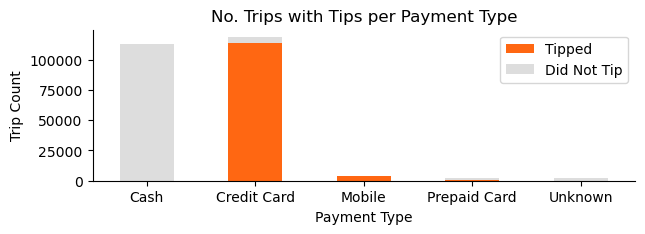

In [13]:
df_payment_tips = df_taxi.pivot_table(index=['payment_type'],
                                      columns='has_tip', aggfunc='size')
df_payment_tips.columns = ['Did Not Tip', 'Tipped']
fig, ax = plt.subplots(figsize=(7, 2), dpi=100)
# df_payment_tips.loc[:, ['Tipped', 'Did Not Tip']].divide(df_payment_tips.sum(axis=1), axis=0) \
#     .plot.bar(stacked=True, ax=ax, color=['#FF6712', '#DDDDDD'], rot=0)
df_payment_tips.loc[:, ['Tipped', 'Did Not Tip']] \
    .plot.bar(stacked=True, ax=ax, color=['#FF6712', '#DDDDDD'], rot=0)
sns.despine()
ax.set_xticklabels(['Cash', 'Credit Card', 'Mobile', 'Prepaid Card', 'Unknown'])
ax.set_xlabel('Payment Type')
ax.set_ylabel('Trip Count')
ax.set_title("No. Trips with Tips per Payment Type")